### 학습목표
- 데이터 수집(Crawling) 방법에 대해서 알수있다
- 웹페이지 구조에 대해서 알수있따
- 컴퓨터를 통해 웹페이지 정보를 주고 받을수있다 (requset 라이브러리)

##### 통신의 기초 : 요청,응답
- Client : 페이지의 정보를 요청하는 PC
- Server : 페이지의 정보를 응답하는 PC 

##### request 라이브러리


In [1]:
import requests as req 

In [3]:
# 라이브러리를 통해 페이지 정보 받아오기 
#url : 웹페이지의 표준 주소 -> 문자열로 작성 
url = 'https://www.naver.com/'
res=req.get(url)
#Response [200] : 성공 ! 페이지의 정보를 잘 입력받아 응답함 
#Response [400] : 문제발생 !! -> Client 단에서 문제발생시 출력 (요청과정에서)
#Response [500] : 문제발생 !! -> Server 단에서 문제발생시 출력 (응답과정에서)

In [4]:
#페이지 정보 확인

res.text
# 앞으로 태그정보를 통해 컴퓨터를 소통하여 원하는 정보를 추출 

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

우리가 확인해야할 문제 
- res.text -> 결과 -> 데이터 타입 -> '문자열' -> html 태그화
- 변환작업 : 문자열 -> html 문서화 (파싱)
- beautifulsoup 라이브러리 활용하여 응답하여 문자열을 html 형태로 변환

In [5]:
# 라이브러리 불러오기 
from bs4 import BeautifulSoup as bs

In [7]:
!pip install lxml

In [9]:
# bs (변경할 데이터 , 파싱 방법)
soup= bs(res.text,'lxml')

In [12]:
res2=req.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%EC%A7%91&ackey=5dhiuylb')

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="strict-origin-when-cross-origin" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="동명동 맛집 : 네이버 검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'동명동 맛집'의 네이버 검색 결과입니다." property="og:description"/> <meta content="'동명동 맛집'의 네이버 검색 결과입니다." lang="ko" name="description"/> <title>동명동 맛집 : 네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_260108a.css?o=search" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic/search/pc/css/search2_251211.css?o=search" rel
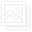
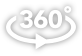
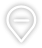
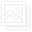
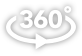
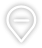

In [14]:
soup2= bs(res2.text,'lxml')
soup2

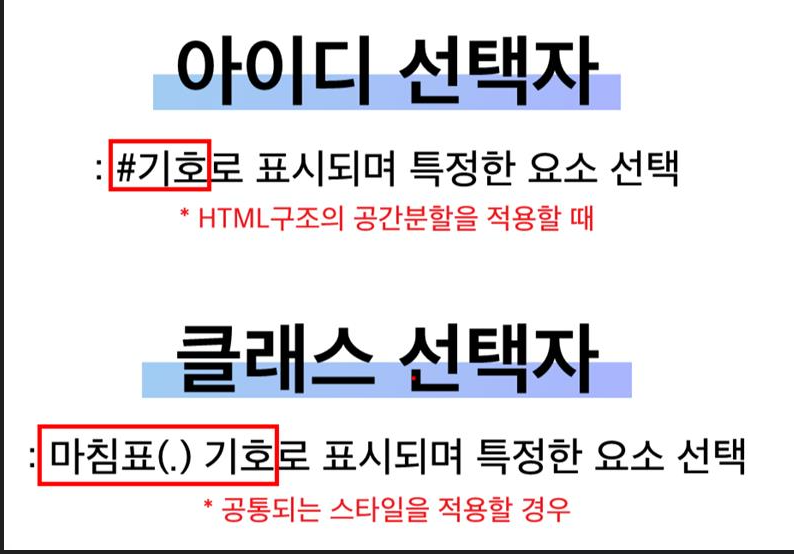

In [15]:
#soup2 가 가지고 있는 페이지 정보에서 블로그 키워드 추출 
#soup2에게 요청  "블로그 글자를 저에게 주세요 ~ " -> 태그 정보를 전달 
#soup2.select ("태그정보") 

soup2.select("a")
#현재 페이제있는 모든 a 태그 추출 -> 명확한 데이터수집을 위해서 다른태그들과 구분 

[<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>,
 <a href="#content"><span>본문 영역으로 바로가기</span></a>,
 <a class="link" href="https://www.naver.com" onclick="return goOtherCR(this, 'a=sta.naver&amp;r=&amp;i=&amp;u='+urlencode(this.href));"><i class="spnew2 ico_logo">NAVER</i></a>,
 <a aria-pressed="false" class="bt_setkr" href="#" id="ke_kbd_btn" onclick="return tCR('a=sch.ime');" role="button"> <i class="spnew2 ico_keyboard">한글 입력기</i> <div class="guide_text">입력도구</div> </a>,
 <a aria-pressed="false" class="bt_atcp _btn_arw" data-atcmp-element="" href="#" id="nautocomplete" role="button"><i class="spnew2 ico_arrow">자동완성 레이어</i><div class="guide_text">검색 레이어</div></a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.blog.all&amp;sm=tab_jum&amp;query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%EC%A7%91" onclick="return goOtherCR(this,'a=tab*b.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_blog"></i>블로그</a>,
 <a aria-selected="false" class="tab" href="?s

In [17]:
elements=soup2.select("a.tab") # 리스트 형태로 추출 

In [20]:
#인덱스에서 원하는 태그 추출 
elements[0]

<a aria-selected="false" class="tab" href="?ssc=tab.blog.all&amp;sm=tab_jum&amp;query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%EC%A7%91" onclick="return goOtherCR(this,'a=tab*b.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_blog"></i>블로그</a>

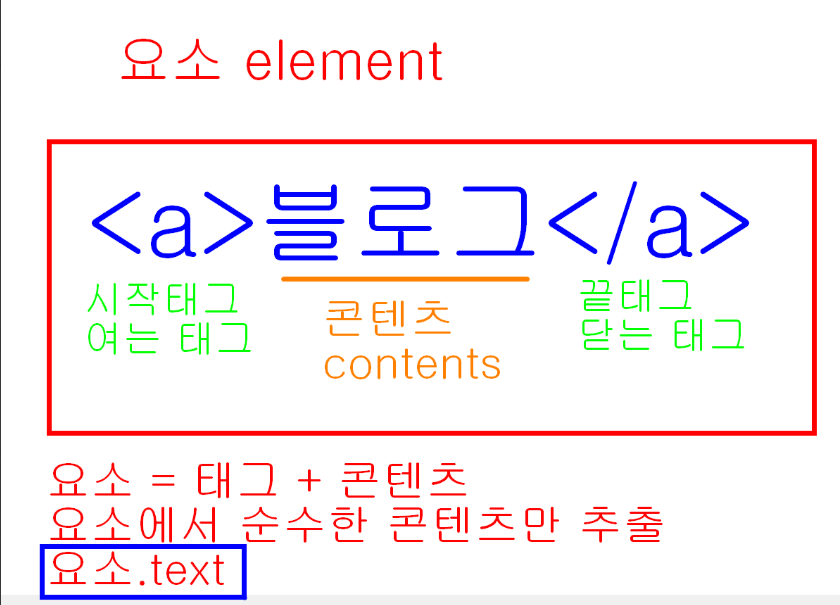

In [21]:
#순수한 contents 를 추출 
elements[0].text

'블로그'

In [ ]:
#select('태그정보')-> 조건에 해당하는 모든 요소 
#select_one('테크정보')-> 조건에 해당하는 요소중 최상단의 요소만 출력 id 선택자로 구성되어있는 요소를 추출할떄 사용

In [25]:
a_tab=soup2.select("a.tab")
for a in a_tab:
    print(a.text)

블로그
카페
이미지
지식iN
인플루언서
동영상
쇼핑
뉴스
숏텐츠
어학사전
지도
도서
지식백과
학술정보
전체
블로그
카페
이미지
지식iN
인플루언서
동영상
쇼핑
뉴스
숏텐츠
어학사전
지도
도서
지식백과
학술정보


### 실습 
- 네이버 날씨 페이지에서 날씨 온도 추출

In [69]:
url='https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%A0%EC%94%A8&ackey=j7u9eah8'

In [70]:
wea=req.get(url)

In [71]:
weat= bs(wea.text,'lxml')

In [75]:
weat.select("div.temperature_text")

[<div class="temperature_text"> <strong><span class="blind">현재 온도</span>2.2<span class="celsius">°</span></strong> </div>,
 <div class="temperature_text"> <strong><span class="blind">예측 온도</span>-6<span class="celsius">°</span></strong> </div>,
 <div class="temperature_text"> <strong><span class="blind">예측 온도</span>2<span class="celsius">°</span></strong> </div>,
 <div class="temperature_text"> <strong><span class="blind">예측 온도</span>-6<span class="celsius">°</span></strong> </div>,
 <div class="temperature_text"> <strong><span class="blind">예측 온도</span>-1<span class="celsius">°</span></strong> </div>]

In [74]:
weat.select("div.temperature_text>strong")

[<strong><span class="blind">현재 온도</span>2.2<span class="celsius">°</span></strong>,
 <strong><span class="blind">예측 온도</span>-6<span class="celsius">°</span></strong>,
 <strong><span class="blind">예측 온도</span>2<span class="celsius">°</span></strong>,
 <strong><span class="blind">예측 온도</span>-6<span class="celsius">°</span></strong>,
 <strong><span class="blind">예측 온도</span>-1<span class="celsius">°</span></strong>]

In [73]:
print(a)

 현재 온도2.2° 


In [78]:
url2='https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90+%EC%A3%BC%EC%8B%9D&oquery=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&tqi=jT2S1dqos5ossi2ZWVR-521688&ackey=6wc7jx63'

In [79]:
sa=req.get(url2)

In [80]:
sam= bs(sa.text,'lxml')

In [103]:
new_title=sam.select('span.sds-comps-text.sds-comps-text-ellipsis.sds-comps-text-ellipsis-1.sds-comps-text-type-headline1')
#하나의 태그에 여러개의 클래스 적용 가능 -> 웹퍼이지상 띄어쓰기 후 작성 
# select 내의 문자열에선는 띄어쓰기가 자손 선택자 
# 클래스 이름에 띄어쓰기가 있다면 띄어쓰리리 (.)로 대체 

In [104]:
new_title[0].text

'삼성전자, 홍라희 2조 주식 처분에 1%대 하락'